In [86]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import plotting
import importlib
importlib.reload(plotting)

<module 'plotting' from '/home/liam-bouffard/Desktop/LASSIE/plotting.py'>

# Load in all depth vs resistance curves into a dataframe list

In [87]:
def load_data(data_src):
    depth_resist_curve_df_list = [] # used for plotting
    filename_list = []
    for filename in os.listdir(data_src):
        df = pd.read_csv(f"{data_src}/{filename}")
        depth_resist_curve_df_list.append(df)
        filename_list.append(filename)
    return depth_resist_curve_df_list, filename_list

data_src = "data/cleaned_data"
depth_resist_curve_df_list, filename_list = load_data(data_src)
filename_to_depth_resist = dict(zip(filename_list, depth_resist_curve_df_list))

In [88]:
data_features_df = pd.read_csv("data/features.csv")
clustering_features_df = plotting.extract_numerical_features(data_features_df)

# K-Means Clustering Implementation w/ k-means++ initialization for centroids

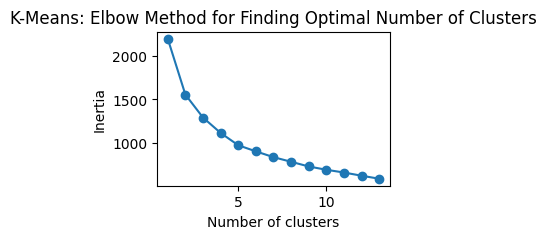

In [89]:
inertias = []
for k in range(1,14):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=100).fit(clustering_features_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(3,2))
plt.plot(range(1,14), inertias, marker='o')
plt.title("K-Means: Elbow Method for Finding Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid=True
plt.show()

# K-Means Clustering
- assumes
    - spherical clusters (isotropic)
    - similar size clusters (equal variance)
    - features are on same scale
    - clusters are linearly separable
    - number of clusters (k) is known

      Eigenvalue    Proportion  Cumulative
PC                                        
1   8.842623e+00  4.381118e-01    0.438112
2   3.443569e+00  1.706132e-01    0.608725
3   2.274977e+00  1.127148e-01    0.721440
4   1.594945e+00  7.902228e-02    0.800462
5   1.027104e+00  5.088834e-02    0.851350
6   8.531041e-01  4.226743e-02    0.893618
7   5.060648e-01  2.507321e-02    0.918691
8   4.081847e-01  2.022370e-02    0.938915
9   2.998186e-01  1.485465e-02    0.953769
10  2.834796e-01  1.404513e-02    0.967815
11  1.830819e-01  9.070877e-03    0.976885
12  1.643297e-01  8.141790e-03    0.985027
13  1.156665e-01  5.730748e-03    0.990758
14  9.758047e-02  4.834669e-03    0.995593
15  3.888170e-02  1.926412e-03    0.997519
16  1.828027e-02  9.057041e-04    0.998425
17  1.712212e-02  8.483232e-04    0.999273
18  1.187976e-02  5.885881e-04    0.999862
19  2.792646e-03  1.383629e-04    1.000000
20  1.538057e-28  7.620375e-30    1.000000


                                 PC1       PC2      

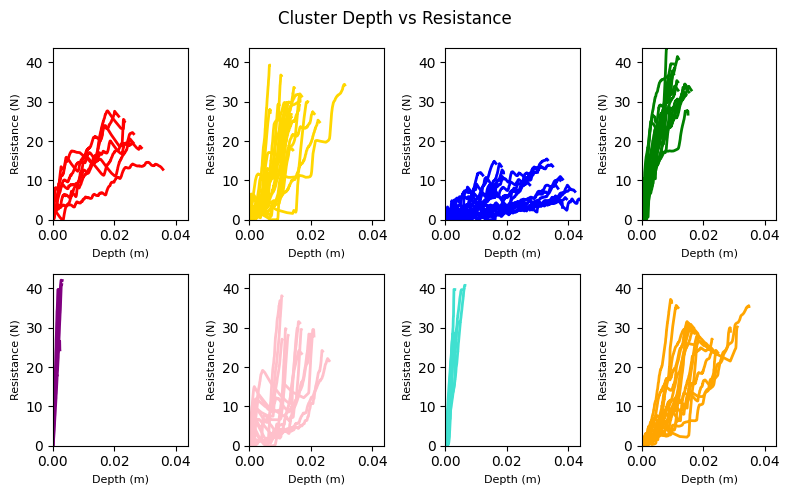

In [90]:
kmeans_elbow = 8
kmeans = KMeans(n_clusters=kmeans_elbow, init="k-means++", n_init=100).fit(clustering_features_df)
# print(f"kmeans cluster centers: {kmeans.cluster_centers_}")
plotting.pca_analysis(clustering_features_df) # printing scree plot
# plotting.plot_clusters_together(kmeans.labels_, "kmeans")
# plotting.plot_clusters_seperately(kmeans.labels_, clustering_features_df.index.tolist(), depth_resist_curve_df_list, data_features_df, "kmeans")
plotting.plot_unsupervised_cluster_subplots(pd.Series(kmeans.labels_), depth_resist_curve_df_list, "kmeans")
plotting.plot_pca(clustering_features_df, y_labels=kmeans.labels_, num_pc=3, graph_title="kmeans",)

# Hierarchical Clustering

In [91]:

# if distance_threshold != None then n_clusters = None
hierarchical = AgglomerativeClustering(distance_threshold=None, n_clusters=8)
hierarchical.fit(clustering_features_df)
linkage = "Ward"
plotting.plot_clusters_seperately(hierarchical.labels_, clustering_features_df.index.tolist(), depth_resist_curve_df_list, data_features_df, 'hierarchical')
plotting.plot_pca(clustering_features_df, y_labels=hierarchical.labels_, num_pc=3, graph_title="hierachical")


AttributeError: module 'plotting' has no attribute 'plot_clusters_seperately'

# DBSCAN

In [ ]:

# eps=0.7, min_samples=3 works very well
# dbscan = DBSCAN(eps=1.8, min_samples=10).fit(clustering_features_df)
# cleaned_db_labels = [label if label != -1 else max(dbscan.labels_)+1 for label in dbscan.labels_]
# # get_curve_idx_from_cluster_color("yellow", cleaned_db_labels)
# plotting.plot_pca(clustering_features_df, cleaned_db_labels, num_pc=3, graph_title='dbscan')
# plotting.plot_clusters_seperately(cleaned_db_labels, clustering_features_df.index.to_list(), depth_resist_curve_df_list)